Davies-Bouldin Index: 0.7086602453786267


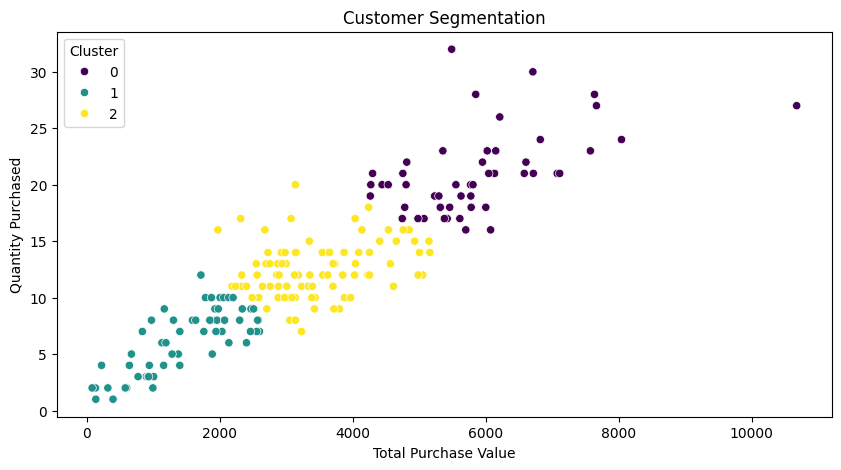

Customer Clustering results saved as Customer_Clusters.csv


In [5]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import davies_bouldin_score

# Load data (Ensure you have customer transaction data)
transactions = pd.read_csv("Transactions.csv")

# Aggregating transaction data per customer
customer_profiles = transactions.groupby("CustomerID").agg({"TotalValue": "sum", "Quantity": "sum"}).reset_index()

# Feature Scaling
scaler = StandardScaler()
customer_profiles_scaled = scaler.fit_transform(customer_profiles[['TotalValue', 'Quantity']])

# K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(customer_profiles_scaled)
customer_profiles["Cluster"] = clusters  # Assigning cluster labels

# Davies-Bouldin Index
db_index = davies_bouldin_score(customer_profiles_scaled, clusters)
print(f"Davies-Bouldin Index: {db_index}")

# Scatter Plot for Clustering
plt.figure(figsize=(10, 5))
sns.scatterplot(x=customer_profiles["TotalValue"], y=customer_profiles["Quantity"], hue=clusters, palette="viridis")
plt.title("Customer Segmentation")
plt.xlabel("Total Purchase Value")
plt.ylabel("Quantity Purchased")
plt.legend(title="Cluster")
plt.show()

# Save the clustering results
customer_profiles.to_csv("Customer_Clusters.csv", index=False)
print("Customer Clustering results saved as Customer_Clusters.csv")
